In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
# download vader lexicon
nltk.download('vader_lexicon') 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/macbook/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
train_df = pd.read_csv('./data/sentiment/drugLibTrain_raw.tsv', sep = '\t') 
train_df.head()

Unnamed: 0       urlDrugName  rating         effectiveness  \
0        2202         enalapril       4      Highly Effective   
1        3117  ortho-tri-cyclen       1      Highly Effective   
2        1146           ponstel      10      Highly Effective   
3        3947          prilosec       3  Marginally Effective   
4        1951            lyrica       2  Marginally Effective   

           sideEffects                               condition  \
0    Mild Side Effects  management of congestive heart failure   
1  Severe Side Effects                        birth prevention   
2      No Side Effects                        menstrual cramps   
3    Mild Side Effects                             acid reflux   
4  Severe Side Effects                            fibromyalgia   

                                      benefitsReview  \
0  slowed the progression of left ventricular dys...   
1  Although this type of birth control has more c...   
2  I was used to having cramps so badly that they...   
3  The acid reflux went away for a few months aft...   
4  I think that the Lyrica was starting to help w...   

                                   sideEffectsReview  \
0  cough, hypotension , proteinuria, impotence , ...   
1  Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...   
2         Heavier bleeding and clotting than normal.   
3  Constipation, dry mouth and some mild dizzines...   
4  I felt extremely drugged and dopey.  Could not...   

                                      commentsReview  
0  monitor blood pressure , weight and asses for ...  
1  I Hate This Birth Control, I Would Not Suggest...  
2  I took 2 pills at the onset of my menstrual cr...  
3  I was given Prilosec prescription at a dose of...  
4                                          See above

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3107 non-null   int64 
 1   urlDrugName        3107 non-null   object
 2   rating             3107 non-null   int64 
 3   effectiveness      3107 non-null   object
 4   sideEffects        3107 non-null   object
 5   condition          3106 non-null   object
 6   benefitsReview     3089 non-null   object
 7   sideEffectsReview  3032 non-null   object
 8   commentsReview     3095 non-null   object
dtypes: int64(2), object(7)
memory usage: 218.6+ KB


In [4]:
test_df = pd.read_csv('./data/sentiment/drugLibTest_raw.tsv', sep = '\t') 
test_df.head()

Unnamed: 0 urlDrugName  rating           effectiveness  \
0        1366      biaxin       9  Considerably Effective   
1        3724    lamictal       9        Highly Effective   
2        3824    depakene       4    Moderately Effective   
3         969     sarafem      10        Highly Effective   
4         696    accutane      10        Highly Effective   

           sideEffects           condition  \
0    Mild Side Effects     sinus infection   
1    Mild Side Effects    bipolar disorder   
2  Severe Side Effects    bipolar disorder   
3      No Side Effects  bi-polar / anxiety   
4    Mild Side Effects        nodular acne   

                                      benefitsReview  \
0  The antibiotic may have destroyed bacteria cau...   
1  Lamictal stabilized my serious mood swings. On...   
2  Initial benefits were comparable to the brand ...   
3  It controlls my mood swings. It helps me think...   
4  Within one week of treatment superficial acne ...   

                                   sideEffectsReview  \
0                      Some back pain, some nauseau.   
1  Drowsiness, a bit of mental numbness. If you t...   
2  Depakene has a very thin coating, which caused...   
3            I didnt really notice any side effects.   
4  Side effects included moderate to severe dry s...   

                                      commentsReview  
0  Took the antibiotics for 14 days. Sinus infect...  
1  Severe mood swings between hypomania and depre...  
2  Depakote was prescribed to me by a Kaiser psyc...  
3  This drug may not be for everyone but its wond...  
4  Drug was taken in gelatin tablet at 0.5 mg per...

In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         1036 non-null   int64 
 1   urlDrugName        1036 non-null   object
 2   rating             1036 non-null   int64 
 3   effectiveness      1036 non-null   object
 4   sideEffects        1036 non-null   object
 5   condition          1036 non-null   object
 6   benefitsReview     1031 non-null   object
 7   sideEffectsReview  1013 non-null   object
 8   commentsReview     1035 non-null   object
dtypes: int64(2), object(7)
memory usage: 73.0+ KB


In [6]:
combine_df = pd.concat([train_df, test_df], axis=0).reset_index()
combine_df.head()

index  Unnamed: 0       urlDrugName  rating         effectiveness  \
0      0        2202         enalapril       4      Highly Effective   
1      1        3117  ortho-tri-cyclen       1      Highly Effective   
2      2        1146           ponstel      10      Highly Effective   
3      3        3947          prilosec       3  Marginally Effective   
4      4        1951            lyrica       2  Marginally Effective   

           sideEffects                               condition  \
0    Mild Side Effects  management of congestive heart failure   
1  Severe Side Effects                        birth prevention   
2      No Side Effects                        menstrual cramps   
3    Mild Side Effects                             acid reflux   
4  Severe Side Effects                            fibromyalgia   

                                      benefitsReview  \
0  slowed the progression of left ventricular dys...   
1  Although this type of birth control has more c...   
2  I was used to having cramps so badly that they...   
3  The acid reflux went away for a few months aft...   
4  I think that the Lyrica was starting to help w...   

                                   sideEffectsReview  \
0  cough, hypotension , proteinuria, impotence , ...   
1  Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...   
2         Heavier bleeding and clotting than normal.   
3  Constipation, dry mouth and some mild dizzines...   
4  I felt extremely drugged and dopey.  Could not...   

                                      commentsReview  
0  monitor blood pressure , weight and asses for ...  
1  I Hate This Birth Control, I Would Not Suggest...  
2  I took 2 pills at the onset of my menstrual cr...  
3  I was given Prilosec prescription at a dose of...  
4                                          See above

In [7]:
combine_df = combine_df.drop(["Unnamed: 0"], axis=1)
combine_df.head()

index       urlDrugName  rating         effectiveness          sideEffects  \
0      0         enalapril       4      Highly Effective    Mild Side Effects   
1      1  ortho-tri-cyclen       1      Highly Effective  Severe Side Effects   
2      2           ponstel      10      Highly Effective      No Side Effects   
3      3          prilosec       3  Marginally Effective    Mild Side Effects   
4      4            lyrica       2  Marginally Effective  Severe Side Effects   

                                condition  \
0  management of congestive heart failure   
1                        birth prevention   
2                        menstrual cramps   
3                             acid reflux   
4                            fibromyalgia   

                                      benefitsReview  \
0  slowed the progression of left ventricular dys...   
1  Although this type of birth control has more c...   
2  I was used to having cramps so badly that they...   
3  The acid reflux went away for a few months aft...   
4  I think that the Lyrica was starting to help w...   

                                   sideEffectsReview  \
0  cough, hypotension , proteinuria, impotence , ...   
1  Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...   
2         Heavier bleeding and clotting than normal.   
3  Constipation, dry mouth and some mild dizzines...   
4  I felt extremely drugged and dopey.  Could not...   

                                      commentsReview  
0  monitor blood pressure , weight and asses for ...  
1  I Hate This Birth Control, I Would Not Suggest...  
2  I took 2 pills at the onset of my menstrual cr...  
3  I was given Prilosec prescription at a dose of...  
4                                          See above

In [8]:
combine_df.describe()

index       rating
count  4143.000000  4143.000000
mean   1294.062515     6.946416
std     909.361540     2.948868
min       0.000000     1.000000
25%     517.500000     5.000000
50%    1035.000000     8.000000
75%    2070.500000     9.000000
max    3106.000000    10.000000

In [9]:
combine_df.isnull().sum()

index                 0
urlDrugName           0
rating                0
effectiveness         0
sideEffects           0
condition             1
benefitsReview       23
sideEffectsReview    98
commentsReview       13
dtype: int64

In [10]:
combine_df.drop(["condition", "benefitsReview", "sideEffectsReview"], inplace=True, axis=1)
combine_df.dropna(inplace=True)
print("DataFrame Length: ", len(combine_df))
combine_df.head()

DataFrame Length:  4130


index       urlDrugName  rating         effectiveness          sideEffects  \
0      0         enalapril       4      Highly Effective    Mild Side Effects   
1      1  ortho-tri-cyclen       1      Highly Effective  Severe Side Effects   
2      2           ponstel      10      Highly Effective      No Side Effects   
3      3          prilosec       3  Marginally Effective    Mild Side Effects   
4      4            lyrica       2  Marginally Effective  Severe Side Effects   

                                      commentsReview  
0  monitor blood pressure , weight and asses for ...  
1  I Hate This Birth Control, I Would Not Suggest...  
2  I took 2 pills at the onset of my menstrual cr...  
3  I was given Prilosec prescription at a dose of...  
4                                          See above

### Preprocessing

In [11]:
stop_words = nltk.corpus.stopwords.words("english") 

In [12]:
def preprocess_text(text):
    # Tokenise the text
    tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text)
    # Remove stopwords
    cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words]
    # Reduced the tokens to their root word using Porter stemmer
    stemmed_tokens = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens]
    return stemmed_tokens

In [13]:
combine_df["processed_text"] = combine_df.apply(lambda row: preprocess_text(row["commentsReview"]), axis=1)
combine_df.head()

index       urlDrugName  rating         effectiveness          sideEffects  \
0      0         enalapril       4      Highly Effective    Mild Side Effects   
1      1  ortho-tri-cyclen       1      Highly Effective  Severe Side Effects   
2      2           ponstel      10      Highly Effective      No Side Effects   
3      3          prilosec       3  Marginally Effective    Mild Side Effects   
4      4            lyrica       2  Marginally Effective  Severe Side Effects   

                                      commentsReview  \
0  monitor blood pressure , weight and asses for ...   
1  I Hate This Birth Control, I Would Not Suggest...   
2  I took 2 pills at the onset of my menstrual cr...   
3  I was given Prilosec prescription at a dose of...   
4                                          See above   

                                      processed_text  
0  [monitor, blood, pressur, weight, ass, resolut...  
1      [hate, birth, control, would, suggest, anyon]  
2  [took, 2, pill, onset, menstrual, cramp, everi...  
3  [given, prilosec, prescript, dose, 45mg, per, ...  
4                                              [see]

## Sentiment analysis

In [14]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# initialize the sentiment intensity analyzer
analyzer = SentimentIntensityAnalyzer() 

In [15]:
def analyze_helper(row):
    text = row['commentsReview']
    result = analyzer.polarity_scores(text)
    return pd.Series([result['neg'], result['neu'], result['pos'], result['compound']])

In [16]:
analyzer.polarity_scores("This movie is very wack")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [17]:
combine_df[['neg', 'neu', 'pos', 'compound']] = combine_df.apply(analyze_helper, axis=1)
combine_df.head()

index       urlDrugName  rating         effectiveness          sideEffects  \
0      0         enalapril       4      Highly Effective    Mild Side Effects   
1      1  ortho-tri-cyclen       1      Highly Effective  Severe Side Effects   
2      2           ponstel      10      Highly Effective      No Side Effects   
3      3          prilosec       3  Marginally Effective    Mild Side Effects   
4      4            lyrica       2  Marginally Effective  Severe Side Effects   

                                      commentsReview  \
0  monitor blood pressure , weight and asses for ...   
1  I Hate This Birth Control, I Would Not Suggest...   
2  I took 2 pills at the onset of my menstrual cr...   
3  I was given Prilosec prescription at a dose of...   
4                                          See above   

                                      processed_text    neg    neu    pos  \
0  [monitor, blood, pressur, weight, ass, resolut...  0.196  0.804  0.000   
1      [hate, birth, control, would, suggest, anyon]  0.291  0.709  0.000   
2  [took, 2, pill, onset, menstrual, cramp, everi...  0.097  0.849  0.054   
3  [given, prilosec, prescript, dose, 45mg, per, ...  0.000  1.000  0.000   
4                                              [see]  0.000  1.000  0.000   

   compound  
0   -0.2960  
1   -0.5719  
2   -0.5106  
3    0.0000  
4    0.0000

In [18]:
combine_df[['neg', 'neu', 'pos', 'compound']]

neg    neu    pos  compound
0     0.196  0.804  0.000   -0.2960
1     0.291  0.709  0.000   -0.5719
2     0.097  0.849  0.054   -0.5106
3     0.000  1.000  0.000    0.0000
4     0.000  1.000  0.000    0.0000
...     ...    ...    ...       ...
4138  0.000  0.942  0.058    0.2732
4139  0.000  1.000  0.000    0.0000
4140  0.273  0.727  0.000   -0.9382
4141  0.000  0.650  0.350    0.9468
4142  0.241  0.759  0.000   -0.2263

[4130 rows x 4 columns]

In [19]:
combine_df[['neg', 'neu', 'pos', 'compound']].describe()

neg          neu          pos     compound
count  4130.000000  4130.000000  4130.000000  4130.000000
mean      0.070867     0.864141     0.063299    -0.033867
std       0.086785     0.123168     0.080321     0.498404
min       0.000000     0.000000     0.000000    -0.998500
25%       0.000000     0.792000     0.000000    -0.401900
50%       0.049000     0.873000     0.042500     0.000000
75%       0.115000     1.000000     0.106000     0.316700
max       0.844000     1.000000     1.000000     0.989700

<Axes: xlabel='compound', ylabel='Count'>

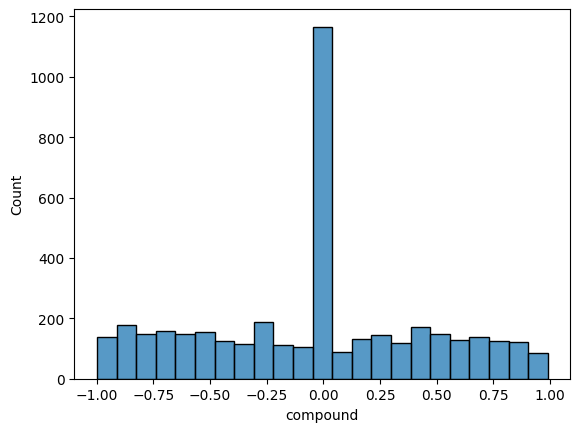

In [20]:
sns.histplot(combine_df['compound'])

<Axes: xlabel='pos', ylabel='Count'>

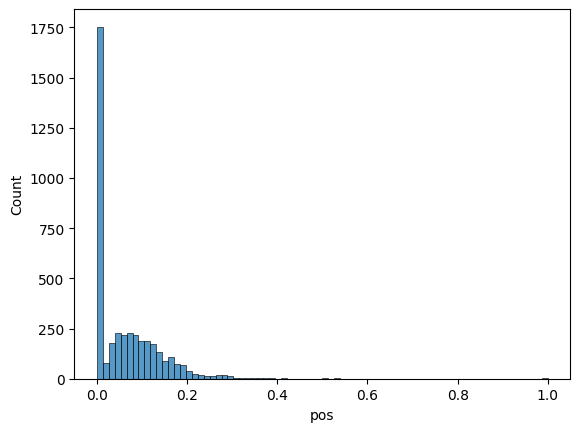

In [21]:
sns.histplot(combine_df['pos'])

<Axes: xlabel='neu', ylabel='Count'>

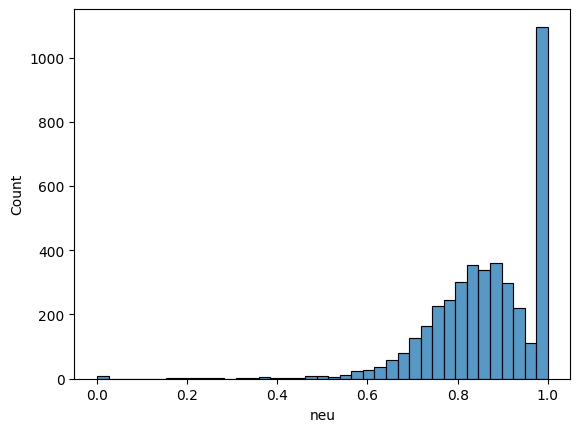

In [22]:
sns.histplot(combine_df['neu'])

<Axes: xlabel='neg', ylabel='Count'>

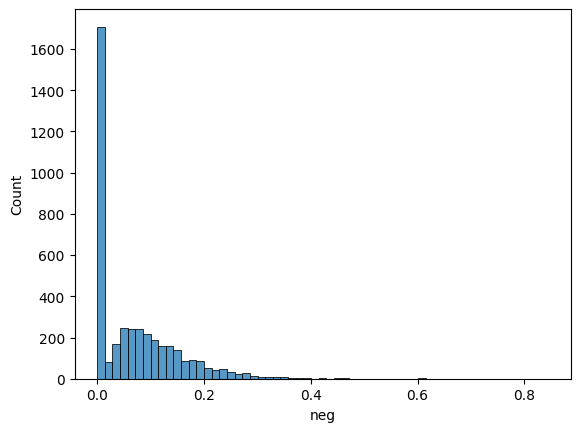

In [23]:
sns.histplot(combine_df['neg'])

In [24]:
# Negative Review
effect_neg = (combine_df["compound"] < -0.5).groupby(combine_df["effectiveness"]).sum()
effect_neg

effectiveness
Considerably Effective    275
Highly Effective          314
Ineffective               100
Marginally Effective       67
Moderately Effective      144
Name: compound, dtype: int64

<Axes: xlabel='% of negative reviews', ylabel='effectiveness'>

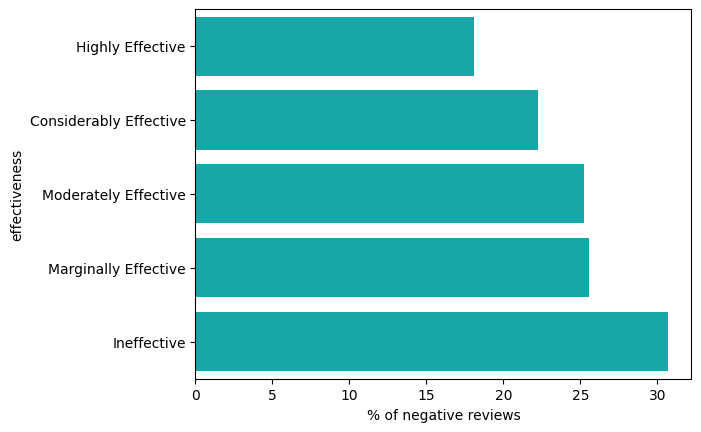

In [25]:
percent_of_neg = pd.DataFrame((combine_df["compound"] < -0.5).groupby(combine_df["effectiveness"]).sum()
                    / combine_df["effectiveness"].groupby(combine_df["effectiveness"]).count() * 100,
                    columns=["% of negative reviews"]).sort_values(by="% of negative reviews")

sns.barplot(data=percent_of_neg, x="% of negative reviews", y=percent_of_neg.index, color="c")

In [26]:
# Negative Review
(combine_df["compound"] < 0).groupby(combine_df["sideEffects"]).sum()

sideEffects
Extremely Severe Side Effects    122
Mild Side Effects                466
Moderate Side Effects            354
No Side Effects                  408
Severe Side Effects              240
Name: compound, dtype: int64

<Axes: xlabel='% of negative reviews', ylabel='sideEffects'>

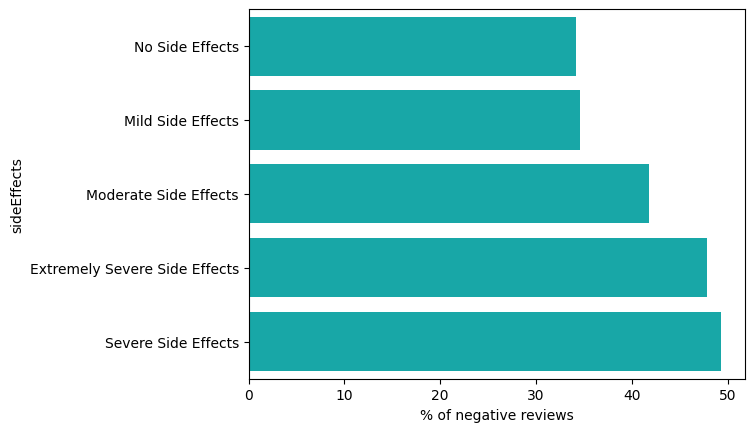

In [27]:
percent_of_neg = pd.DataFrame((combine_df["compound"] < 0).groupby(combine_df["sideEffects"]).sum()
                    / combine_df["sideEffects"].groupby(combine_df["sideEffects"]).count() * 100,
                    columns=["% of negative reviews"]).sort_values(by="% of negative reviews")

sns.barplot(data=percent_of_neg, x="% of negative reviews", y=percent_of_neg.index, color="c")

### N

In [28]:
from wordcloud import WordCloud
from nltk.probability import FreqDist 
def plot_wordcloud_and_freqdist(data, title):
    tokens = [word for review in data["processed_text"] for word in review]
    wordcloud = WordCloud(background_color="white").generate_from_text(" ".join(tokens))
    plt.figure(figsize=(10,10))
    plt.title(title, fontsize=14)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

    freq_dist = FreqDist(tokens)
    freq_dist.tabulate(10)

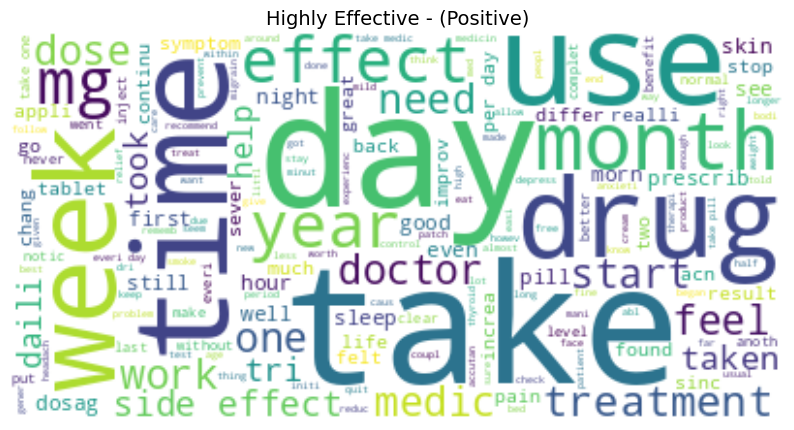

  take    day effect   year   week  month     mg   time   drug    one 
   464    420    234    184    183    176    172    171    171    169 


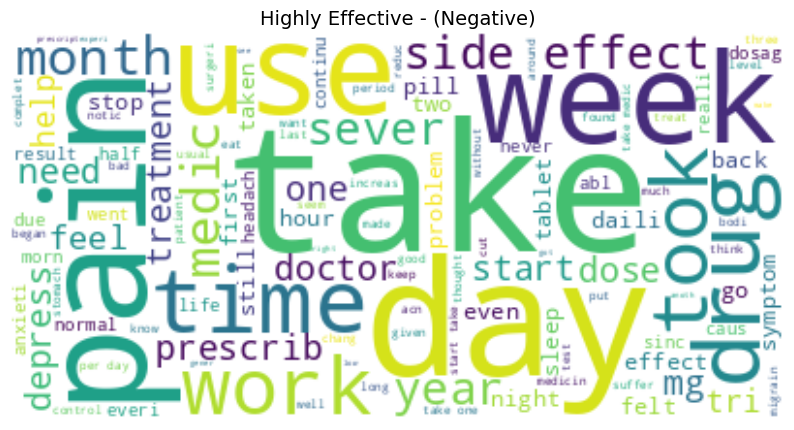

  take    day effect   pain     mg    one   time   year   week  medic 
   472    356    199    195    177    171    166    164    163    156 


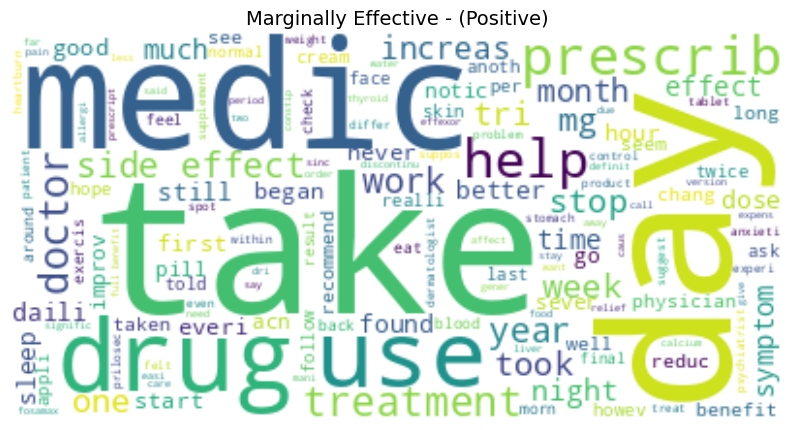

    take      day   effect    medic     drug      use prescrib     year     side     help 
      51       47       34       31       28       26       25       24       24       23 


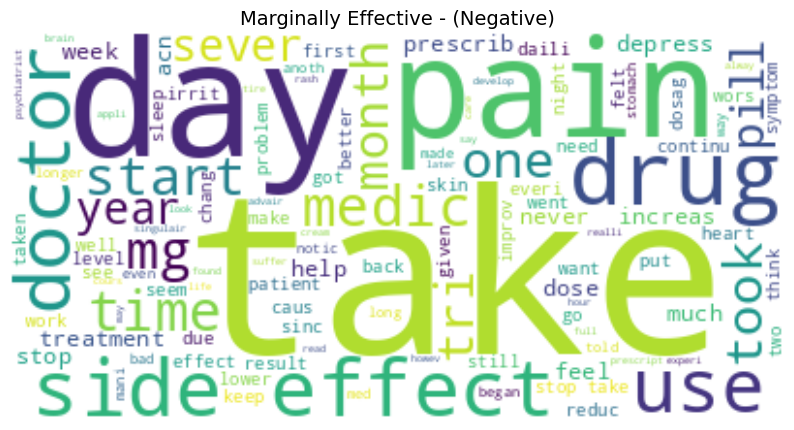

  take    day effect   pain   drug   side doctor   stop    use  medic 
    95     71     57     49     43     43     37     36     36     35 


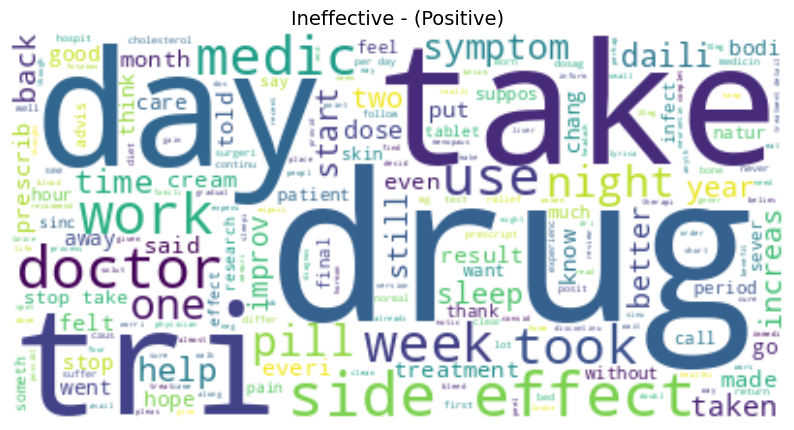

  drug   take    day effect    tri   side doctor   work   week  medic 
    46     45     40     31     30     25     22     21     19     19 


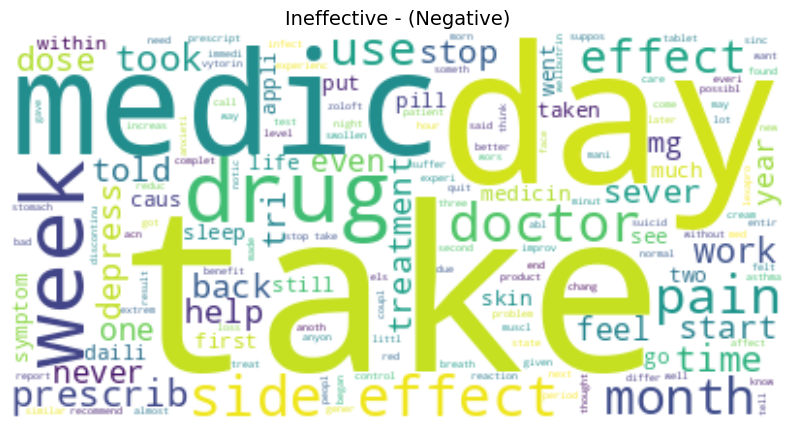

    take      day   effect   doctor    medic     side     drug     week     pain prescrib 
     105       97       94       66       65       60       56       55       48       48 


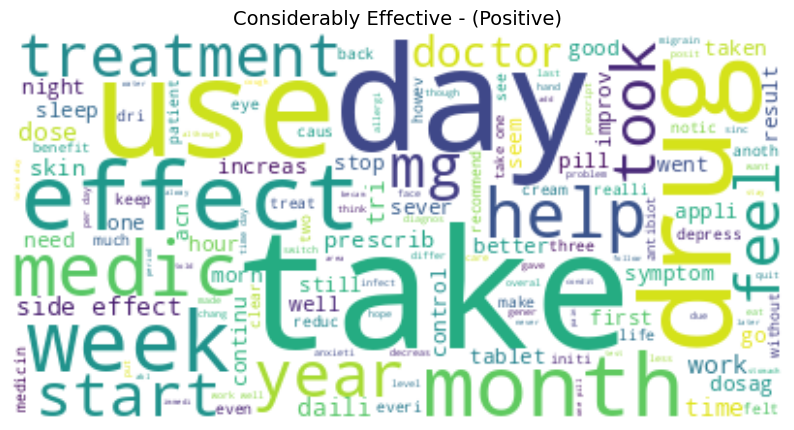

  take    day effect    use     mg   drug  medic   week    one   work 
   274    213    184    139    115    115    114    106    104    104 


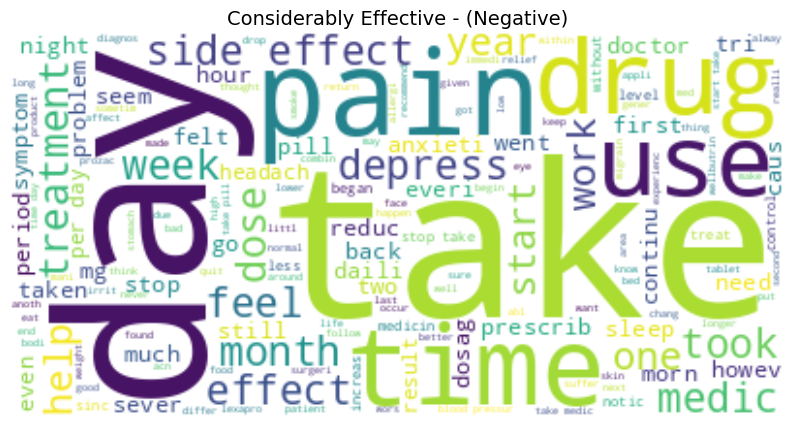

  take    day effect   pain   time    use  month   drug  medic   side 
   324    292    198    158    152    124    122    122    117    115 


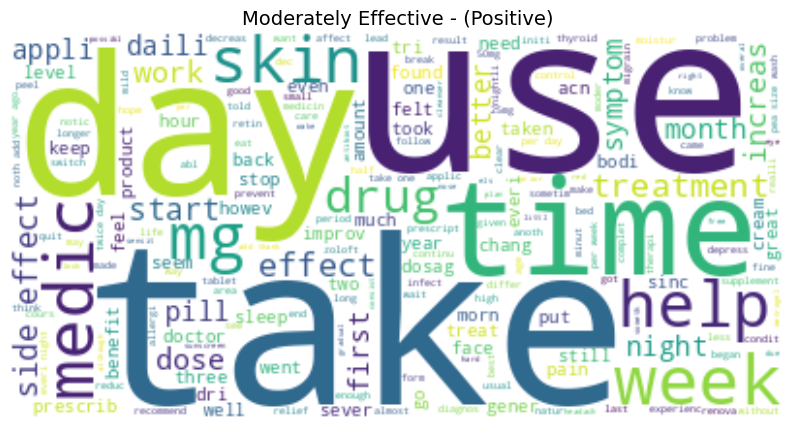

  take    use    day effect   time   week  medic   help     mg   skin 
    95     82     75     66     50     47     39     37     36     36 


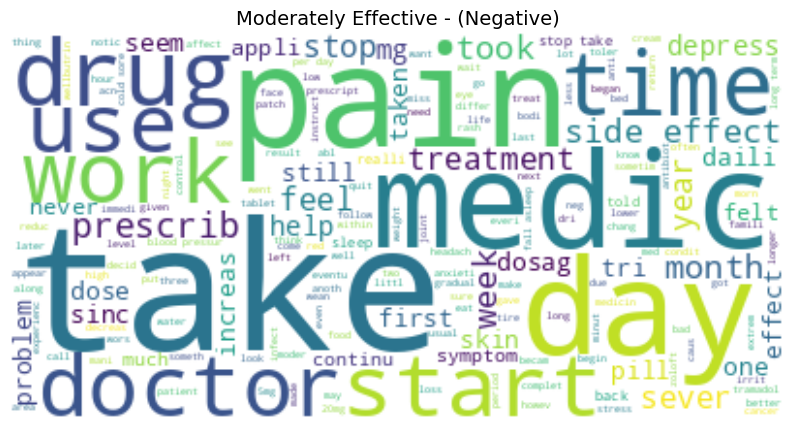

  take    day   pain effect  medic   stop   drug   time   work  start 
   159    100     85     79     77     69     69     63     62     61 


In [29]:
for x in combine_df["effectiveness"].unique():
    positive_sentiment = combine_df.loc[(combine_df["effectiveness"] == x) & (combine_df["compound"] > 0), : ]
    negative_sentiment = combine_df.loc[(combine_df["effectiveness"] == x) & (combine_df["compound"] < 0), : ]
    plot_wordcloud_and_freqdist(positive_sentiment, x + " - (Positive)")
    plot_wordcloud_and_freqdist(negative_sentiment, x + " - (Negative)")

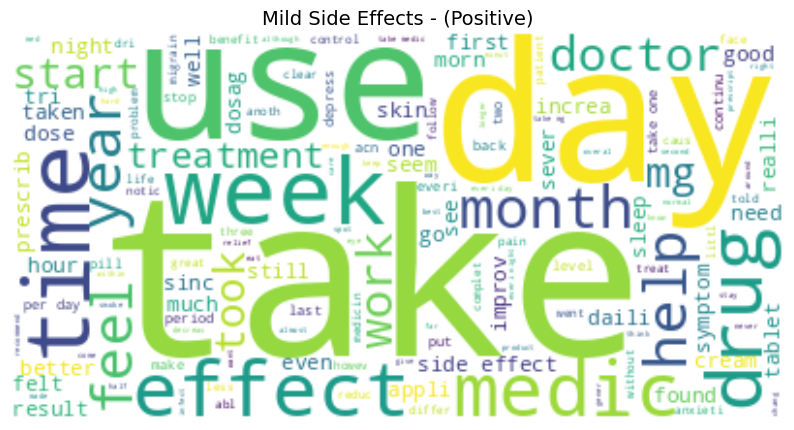

  take    day effect    use     mg    one   week  medic   drug   year 
   381    312    198    157    151    142    142    137    135    128 


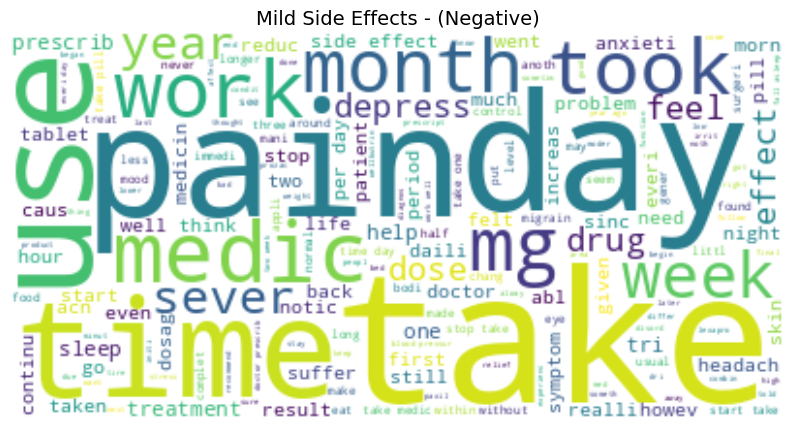

  take    day   pain effect   time  medic   year   work    use    one 
   393    268    181    165    161    149    135    127    126    121 


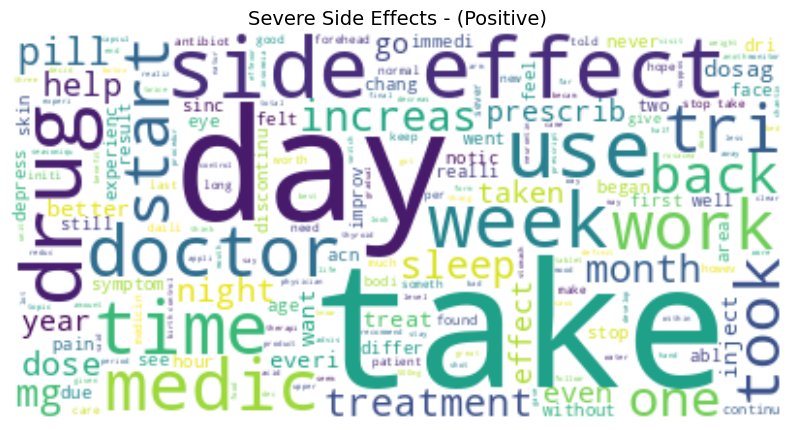

  take effect   side    day   drug    use   week  would   time  medic 
    73     67     52     50     48     43     37     36     35     33 


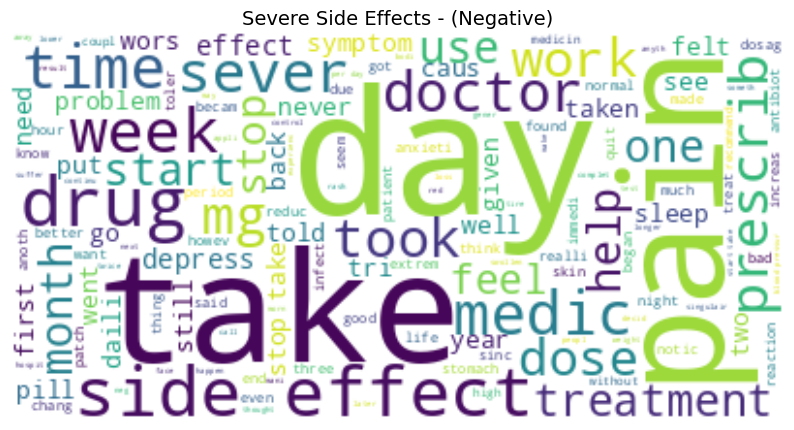

   day   take effect   side   pain   drug   week  medic   time   stop 
   161    158    132    102     97     92     72     69     67     64 


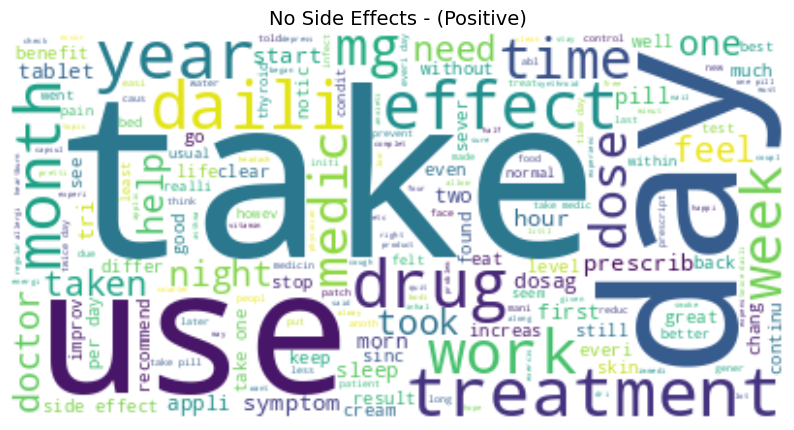

     take       day       use    effect       one      year      work     daili treatment     month 
      307       237       131       129       112       107       103       102       100        99 


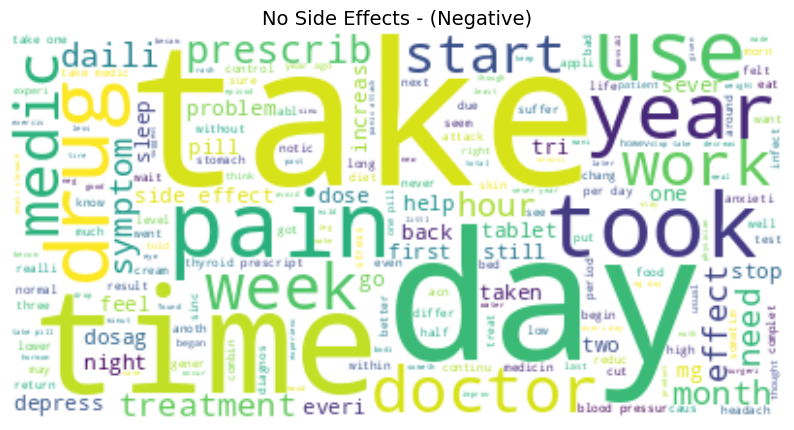

  take    day effect   year    one   time   pain doctor  medic   took 
   278    228    118    117    104    102    102     98     96     92 


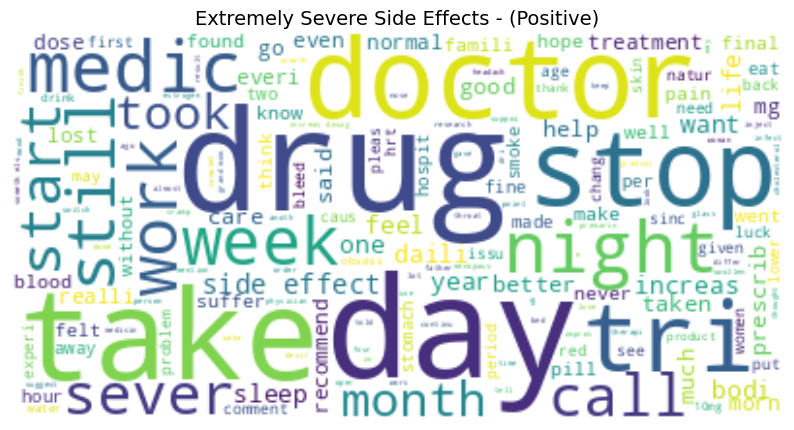

    day    drug    take   would  doctor    like    stop     tri   night increas 
     30      29      23      20      17      16      15      13      13      13 


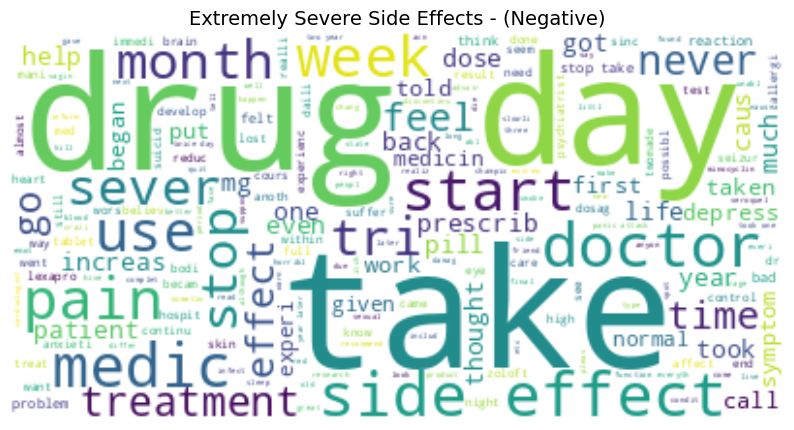

  take effect    day   drug   side doctor  medic   stop   pain  start 
    85     73     70     65     54     47     44     43     41     41 


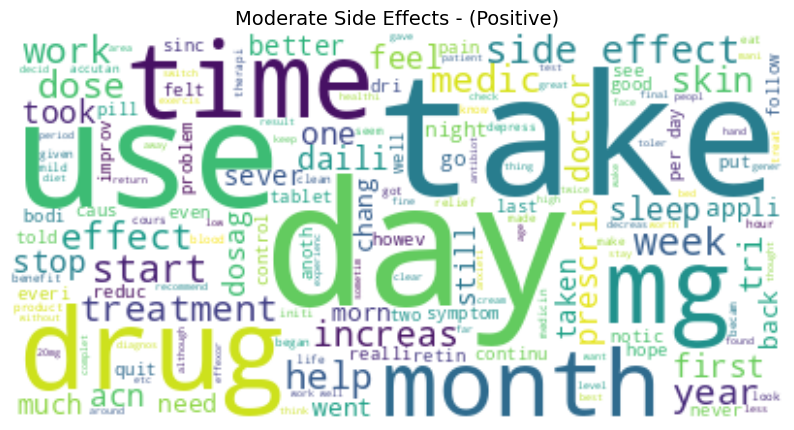

   day   take effect    use   drug     mg  month   year   week   side 
   166    145    144    100     94     93     86     86     85     82 


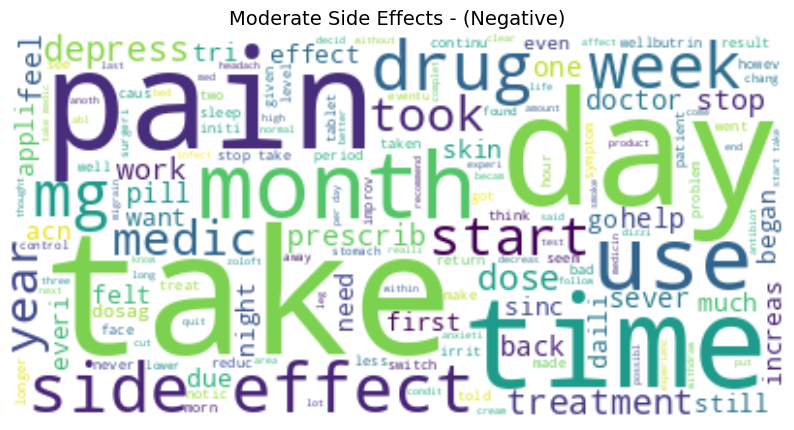

  take    day effect   pain  month   time   side    use   week   stop 
   241    189    139    114    104     99     98     96     95     95 


In [30]:
for x in combine_df["sideEffects"].unique():
    positive_sentiment = combine_df.loc[(combine_df["sideEffects"] == x) & (combine_df["compound"] > 0), : ]
    negative_sentiment = combine_df.loc[(combine_df["sideEffects"] == x) & (combine_df["compound"] < 0), : ]
    plot_wordcloud_and_freqdist(positive_sentiment, x + " - (Positive)")
    plot_wordcloud_and_freqdist(negative_sentiment, x + " - (Negative)")